In [2]:
!pip install numpy

  Using cached numpy-2.3.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.0-cp312-cp312-win_amd64.whl (12.7 MB)


In [4]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 2.8 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 3.2 MB/s eta 0:00:01
   ------------------------------------- -- 2.1/2.2 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 3.3 MB/s eta 0:00:00
Using cached k

In [6]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl (10.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl (41.0 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- -----------------

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
# 데이터 불러오기
diabetes = load_diabetes()
X = diabetes.data[:, 2].reshape(-1,1) # BMI 특성만 사용
y = diabetes.target

# 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 다항 특성 생성
poly = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 특성 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

Ridge score (train): 0.35513960516524035
Ridge score (test): 0.30915883898050245


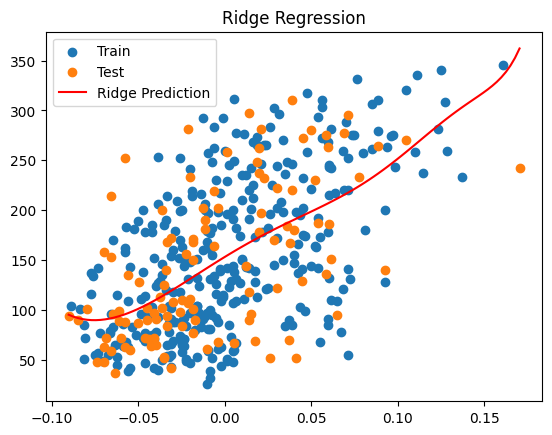

In [10]:
# 릿지 모델 생성 및 학습
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# 평가
print("Ridge score (train):", ridge.score(X_train_scaled, y_train))
print("Ridge score (test):", ridge.score(X_test_scaled, y_test))

# 시각화
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
line_poly = poly.transform(line)
line_scaled = scaler.transform(line_poly)
plt.plot(line, ridge.predict(line_scaled), color='red', label='Ridge Prediction')
plt.legend()
plt.title("Ridge Regression")
plt.show()

Lasso score (train): 0.36345849770878014
Lasso score (test): 0.06727534506637156


c:\Users\rlath\Desktop\김송미\09_머신러닝\source\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.881e+05, tolerance: 2.001e+02
  model = cd_fast.enet_coordinate_descent(


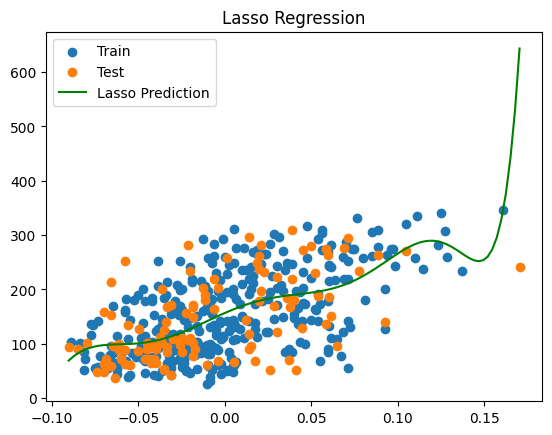

In [11]:
# 라쏘 모델 생성 및 학습
lasso = Lasso(alpha=0.01, max_iter=10000)  # max_iter를 충분히 크게
lasso.fit(X_train_scaled, y_train)

# 평가
print("Lasso score (train):", lasso.score(X_train_scaled, y_train))
print("Lasso score (test):", lasso.score(X_test_scaled, y_test))

# 시각화
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.plot(line, lasso.predict(line_scaled), color='green', label='Lasso Prediction')
plt.legend()
plt.title("Lasso Regression")
plt.show()
